In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn.svm

import utils

In [2]:
def load_dataset_up_down(size, seed=123):
    np.random.seed(seed)
    # Generación de valores aleatorios
    x1 = np.random.poisson(5, size)
    x1 *= np.random.randint(0, 2, size) * 2 - 1
    x2 = np.random.poisson(5, size) + 1
    x2 *= np.random.randint(0, 2, size) * 2 - 1
    # Valores (x1, x2)
    X = np.array(list(zip(x1, x2)))
    # Si x2 > 0, entonces pertenece a categoría 1
    # Si x2 < 0, entonces pertenece a categoría 0
    Y = (X[:, 1] > 0).astype(np.int8)
    return X, Y

# SVMs

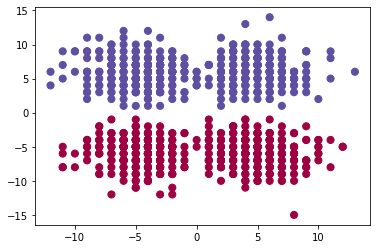

In [3]:
X, Y = load_dataset_up_down(1000)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap=plt.cm.Spectral);

y = 0.0018706396195175376 * x + 0.0008920861094038888


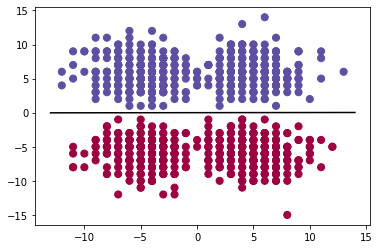

In [4]:
clf = sklearn.svm.LinearSVC()
clf.fit(X, Y)

w = clf.coef_[0]
a = - w[0] / w[1]
b = - clf.intercept_[0] / w[1]
xx = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
yy = a * xx + b

print (f'y = {a} * x + {b}')

plt.plot(xx, yy, 'k-', label='non weighted div')
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap=plt.cm.Spectral);

### In the perceptron demo, we added some extra points and the accuracy decreased... what would happen now?

Accuracy: 100.0


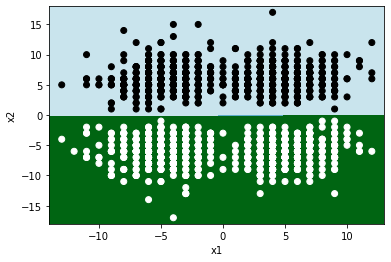

In [5]:
X, Y = load_dataset_up_down(1500)

utils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)

predictions = clf.predict(X)
print(f'Accuracy: {(np.sum(Y == predictions)) / float(Y.size) * 100}')

### Now, what if the training data have some noise now?

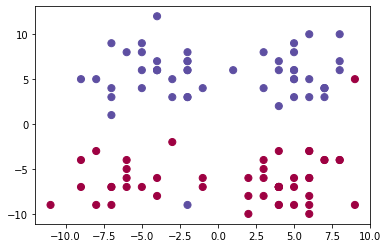

In [6]:
X, Y = load_dataset_up_down(100, 1)

some_noise = np.random.binomial(1, 0.01, Y.shape[0])

Y = np.logical_xor(Y, some_noise).astype(np.int8)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap=plt.cm.Spectral);

### Adjust the parameter C

Accuracy: 98.0


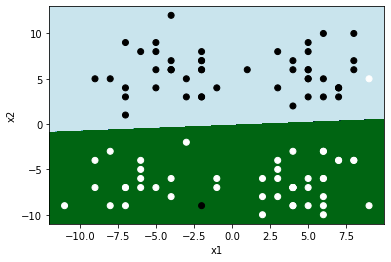

In [7]:
clf = sklearn.svm.LinearSVC(C=0.0001)
clf.fit(X, Y);

utils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)

predictions = clf.predict(X)
print(f'Accuracy: {(np.sum(Y == predictions)) / float(Y.size) * 100}')